<a href="https://colab.research.google.com/github/MinhDucBee1209/Bai-Tap-AI/blob/main/AI_W9_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print('x_train : ',x_train.shape)
print('y_train :',y_train.shape)
print('x_test : ',x_test.shape)
print('y_test : ',y_test.shape)

170498071/170498071 [==============================] - 20s 0us/step
x_train :  (50000, 32, 32, 3)
y_train : (50000, 1)
x_test :  (10000, 32, 32, 3)
y_test :  (10000, 1)


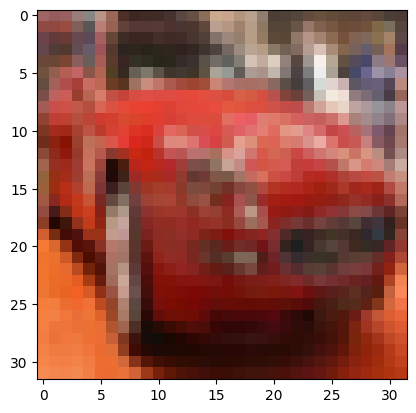

In [5]:
digit = x_train[5]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

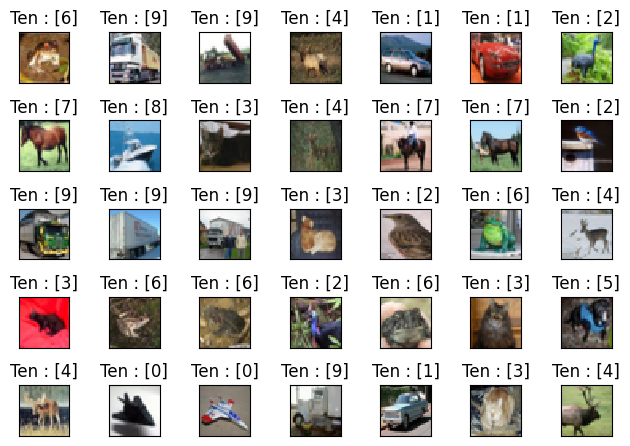

In [6]:
for i in range(35) :
  plt.subplot(5,7,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray',interpolation='none')
  plt.title ('Ten : {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [7]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential ()
model.add(Dense (10000,activation='relu',input_shape =(32*32*3,)))
model.add(Dense (2000,activation='relu'))
model.add(Dense (1000,activation='relu'))
model.add(Dense (500,activation='relu'))
model.add(Dense (10 ,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             30730000  
                                                                 
 dense_1 (Dense)             (None, 2000)              20002000  
                                                                 
 dense_2 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 10)                5010      
                                                                 
Total params: 53,238,510
Trainable params: 53,238,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
X=x_test
Y=y_test
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255 #Chuyen du lieu 0->255 thanh 0->1
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255

In [9]:
x_test.shape

(10000, 3072)

In [10]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Mat mat : ',test_loss)
print('Do chinh sat : ', test_acc)

Epoch 1/10
391/391 [==============================] - 12s 15ms/step - loss: 2.3252 - accuracy: 0.2304
Epoch 2/10
391/391 [==============================] - 6s 14ms/step - loss: 1.8525 - accuracy: 0.3286
Epoch 3/10
391/391 [==============================] - 6s 15ms/step - loss: 1.7604 - accuracy: 0.3646
Epoch 4/10
391/391 [==============================] - 6s 15ms/step - loss: 1.6909 - accuracy: 0.3908
Epoch 5/10
391/391 [==============================] - 6s 15ms/step - loss: 1.6327 - accuracy: 0.4142
Epoch 6/10
391/391 [==============================] - 6s 15ms/step - loss: 1.5872 - accuracy: 0.4332
Epoch 7/10
391/391 [==============================] - 6s 15ms/step - loss: 1.5475 - accuracy: 0.4462
Epoch 8/10
391/391 [==============================] - 6s 15ms/step - loss: 1.5094 - accuracy: 0.4588
Epoch 9/10
391/391 [==============================] - 6s 15ms/step - loss: 1.4719 - accuracy: 0.4736
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 1.4935 - accura

In [11]:
model.save('test2.h5')

1/1 [==============================] - 0s 58ms/step


array([1])

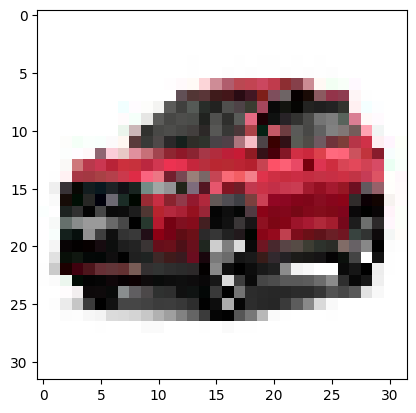

In [13]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
img = load_img("/content/car.jpg",target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,32*32*3)
img = img.astype('float32')
img =img/255
model10 = load_model('test2.h5')
np.argmax(model10.predict(img),axis=1)

